File Handling

Modes:
write: w
To create/write on a file
Mode = x: it only create new file

In [1]:
#Search top 10 result from google and save in a file with the same name using w mode

from googlesearch import search

what=input("What do you want to search: ")
how_many=int(input("How many top result do you want? "))

data=search(what,num_results=how_many)
all_data=[]
for i in data:
    all_data.append(i+'\n')
what+='.txt'
file=open(what,mode='w')
file.writelines(all_data)
file.close()
print("Done")

Done


In [2]:
#Search top 10 result from google and save in a file with the same name using x mode


from googlesearch import search

what=input("What do you want to search: ")
how_many=int(input("How many top result do you want? "))
try:
    data=search(what,num_results=how_many)
    all_data=[]
    for i in data:
        all_data.append(i+'\n')
    what+='.txt'
    file=open(what,mode='x')
    file.writelines(all_data)
    file.close()
except:
    print("File already exist for x mode")
print("Done")
#h

Done


In [ ]:
#Search top 10 result from google and save in a file with the same name using 'a' mode


from googlesearch import search

what=input("What do you want to search: ")
how_many=int(input("How many top result do you want? "))
try:
        data=search(what,num_results=how_many)
        all_data=[]
        for i in data:
            all_data.append(i+'\n')
        what+='.txt'
        file=open(what,mode='a')
        file.writelines(all_data)
        file.write("------------------------------------------------------\n")
        file.close()
except:
        print("File already exist for x mode")
print("Done")

Done


Can we write on a file while reading it? using w+, r+

In [4]:
what=input("What do you want to search: ")
how_many=int(input("How many top result do you want? "))
try:
    data=search(what,num_results=how_many)
    all_data=[]
    for i in data:
        all_data.append(i+'\n')
    what+='.txt'
    file=open(what,mode='w+')
    file.writelines(all_data)
    file.write("------------------------------------------------------\n")
    print(file.read()) #This won't read because because the cursor is at the end, bring it to the first
    file.close()   
except:
    print("There was an error")
print("Done")


Done


In [5]:
#Fix of the above code logic to read the file after writing 

what=input("What do you want to search: ")
how_many=int(input("How many top result do you want? "))
try:
    data=search(what,num_results=how_many)
    all_data=[]
    for i in data:
        all_data.append(i+'\n')
    what+='.txt'
    file=open(what,mode='w+')
    file.writelines(all_data)
    file.write("------------------------------------------------------\n")
    file.seek(0) #Bring the pointer to the beginning
    print(file.read()) 
    file.close()   
except:
    print("There was an error")
print("Done")

https://en.wikipedia.org/wiki/Arrow_Lake_(microprocessor)
https://www.reddit.com/r/intel/comments/1d823q9/intel_arrow_lake_desktop_cpu_whispers_launching/
https://www.intel.com/content/www/us/en/products/sku/241060/intel-core-ultra-9-processor-285k-36m-cache-up-to-5-70-ghz/specifications.html
https://www.google.com/search?num=12
https://www.youtube.com/watch?v=wusyYscQi0o
https://videocardz.com/newz/intel-arrow-lake-refresh-with-higher-clocks-coming-this-half-of-the-year
https://www.intel.com/content/www/us/en/content-details/830252/intel-core-ultra-processors-series-2-for-the-edge-overview-codenamed-arrow-lake-u-h.html
https://www.reddit.com/r/intel/comments/1ltnqpc/intel_arrow_lake_refresh_with_higher_clocks/
https://www.pcmag.com/news/arrow-lake-h-tested-intels-core-ultra-9-mobile-chip-vies-for-first-place
https://www.croma.com/unboxed/intel-arrow-lake-processors-announced?srsltid=AfmBOorVrLGJFLuFnQvb2euY-4Wx3DhDP97ILFDy2zik6DpRiI_IXjsL
----------------------------------------------

How to create a copy of an existing file

In [6]:
file1=open('Day_4.txt','w')
file1.write("This is text")

existing_data=input("Enter the name of the file you want to copy: ")
existing_data+='.txt'
f1=open(existing_data,'r')
all_data=f1.read()

new_file=input("Enter the name of the new file you want to copy to: ")
new_file+='.txt'
f2=open(new_file,'w')
f2.write(all_data)

file1.close()
f1.close()
f2.close()


Binary File Handling

In [ ]:
#Please change the path
path="D:\\Data Science\\Summer-Training-Project\\Day_4\\572-ABA19-FA05-44-C2-9055-797-AC53620-DC.jpg"
file=open(path,'rb')
data=file.read()
#data=data[:10]
print(data)
print(type(data))
file.close()
print("done")

#Now write it to a new file by write binary mode

path="New Creation.jpg"
file=open(path,'wb')
file.write(data)
file.close()
print("Done")

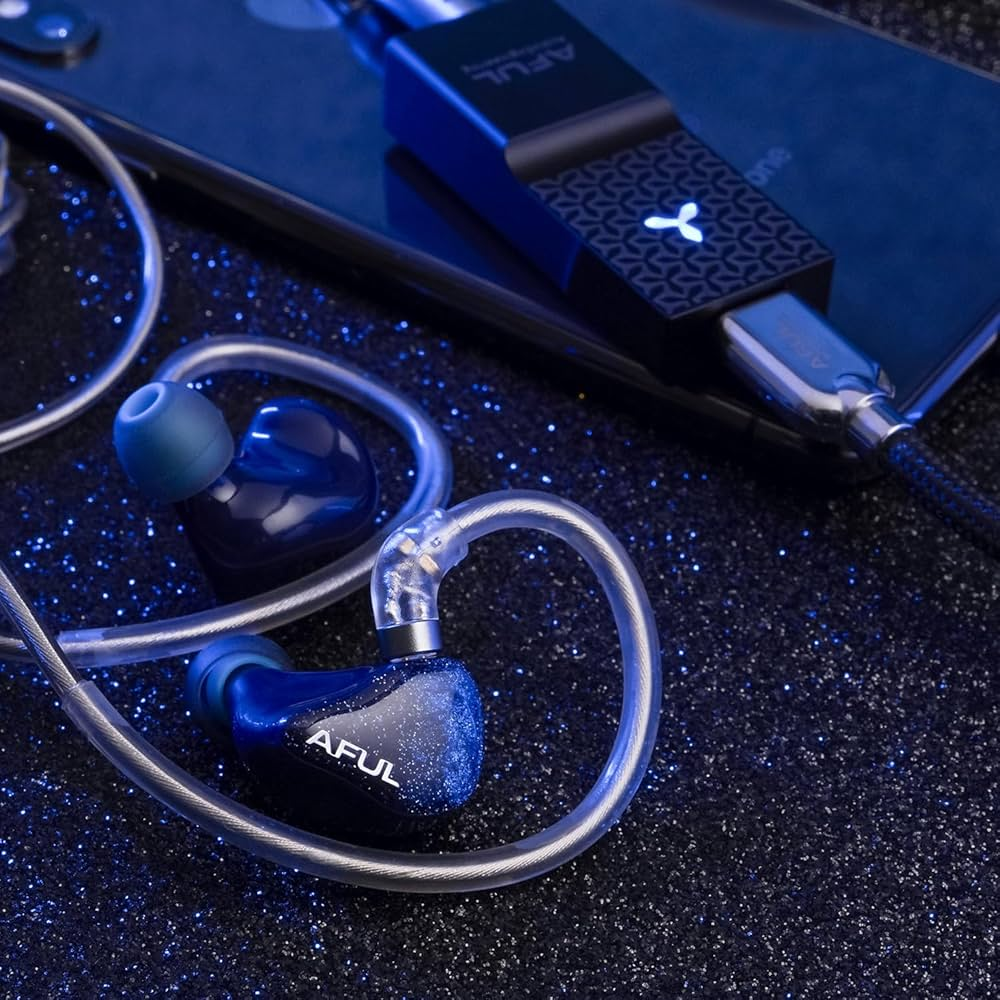

In [8]:
import requests as r
from IPython import display
url="https://m.media-amazon.com/images/I/81LwTl62tAL._UF1000,1000_QL80_.jpg"

image_data=r.get(url).content
type(image_data)

#Now copying the file from the url to local file using file write

file=open('Download_Image.jpg','wb')
file.write(image_data)
file.close()

#display image using IPython
display.Image('Download_Image.jpg')

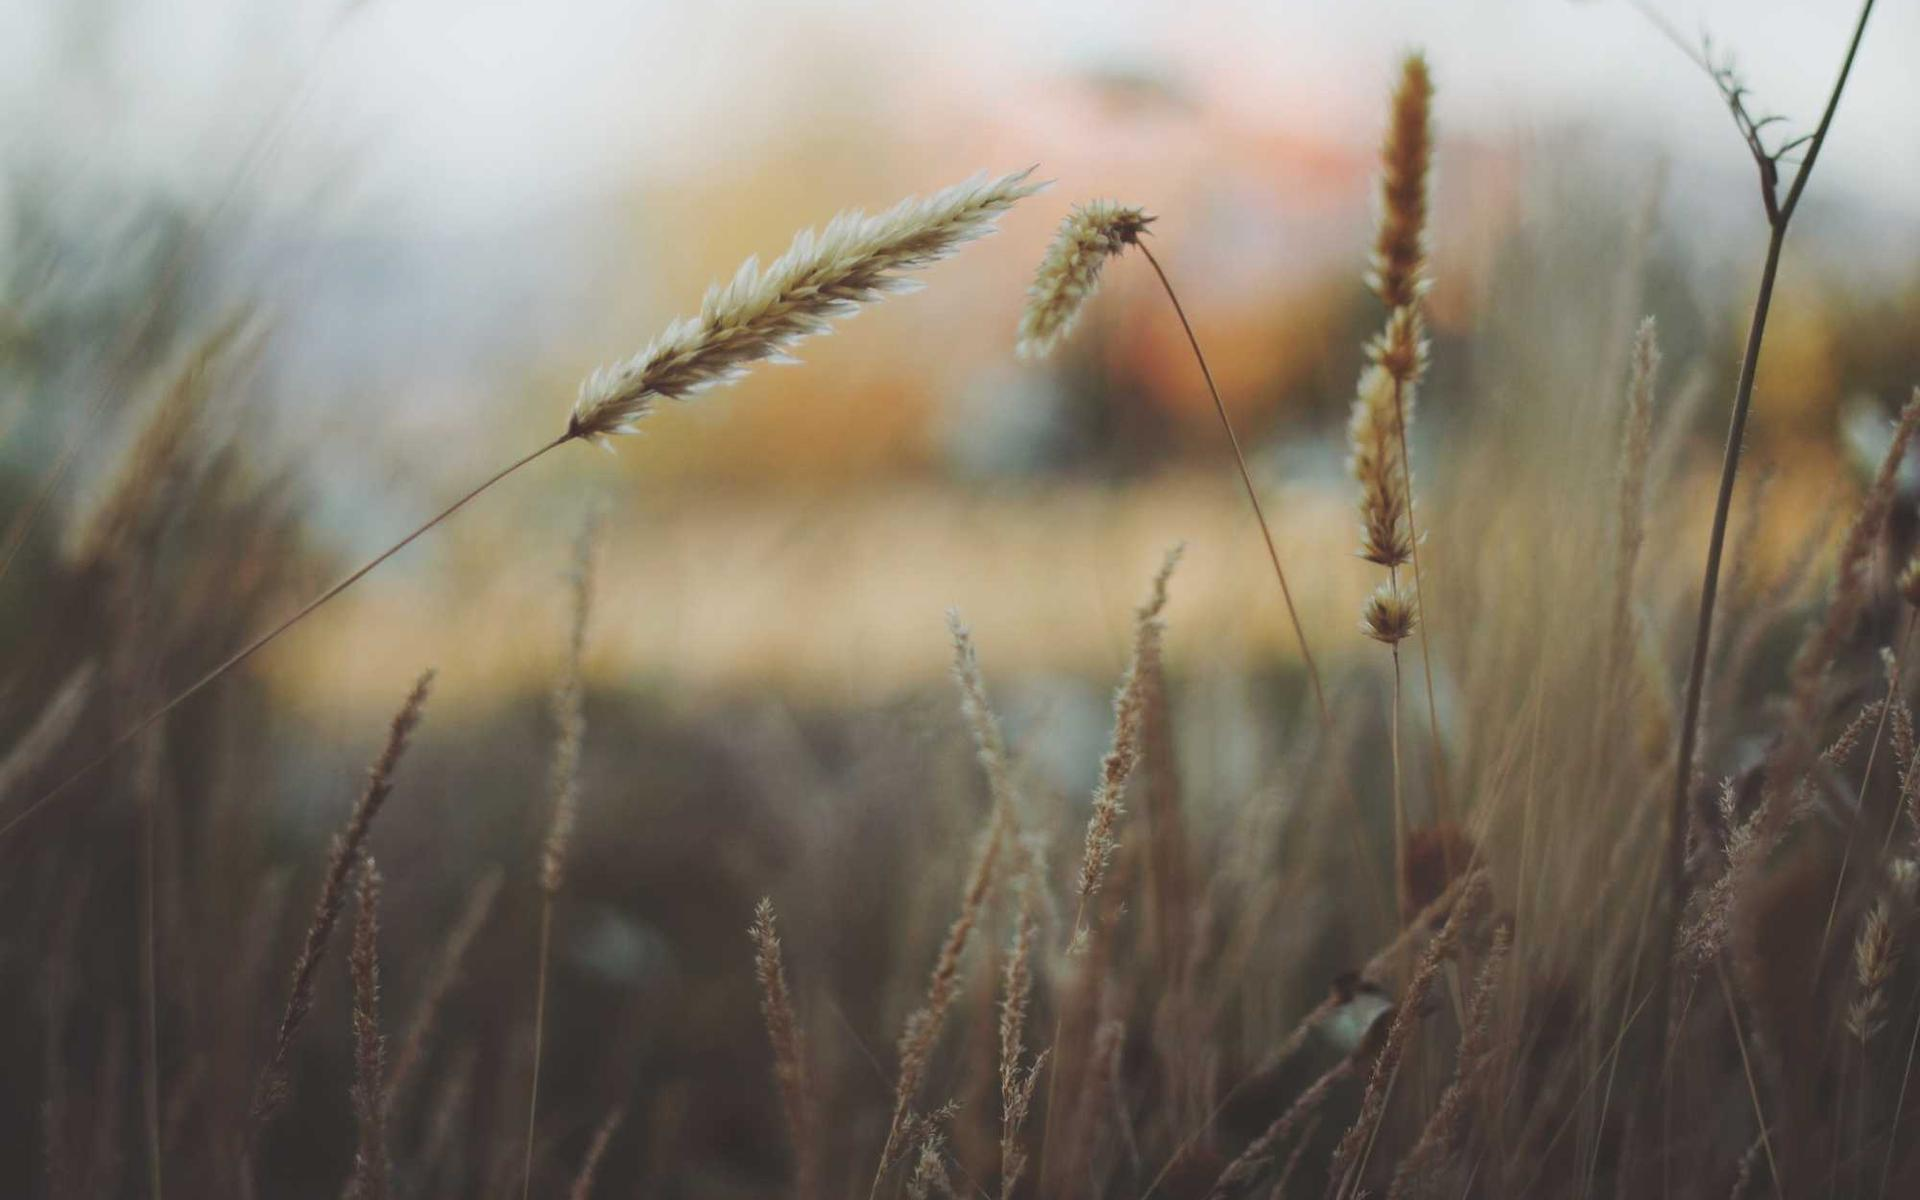

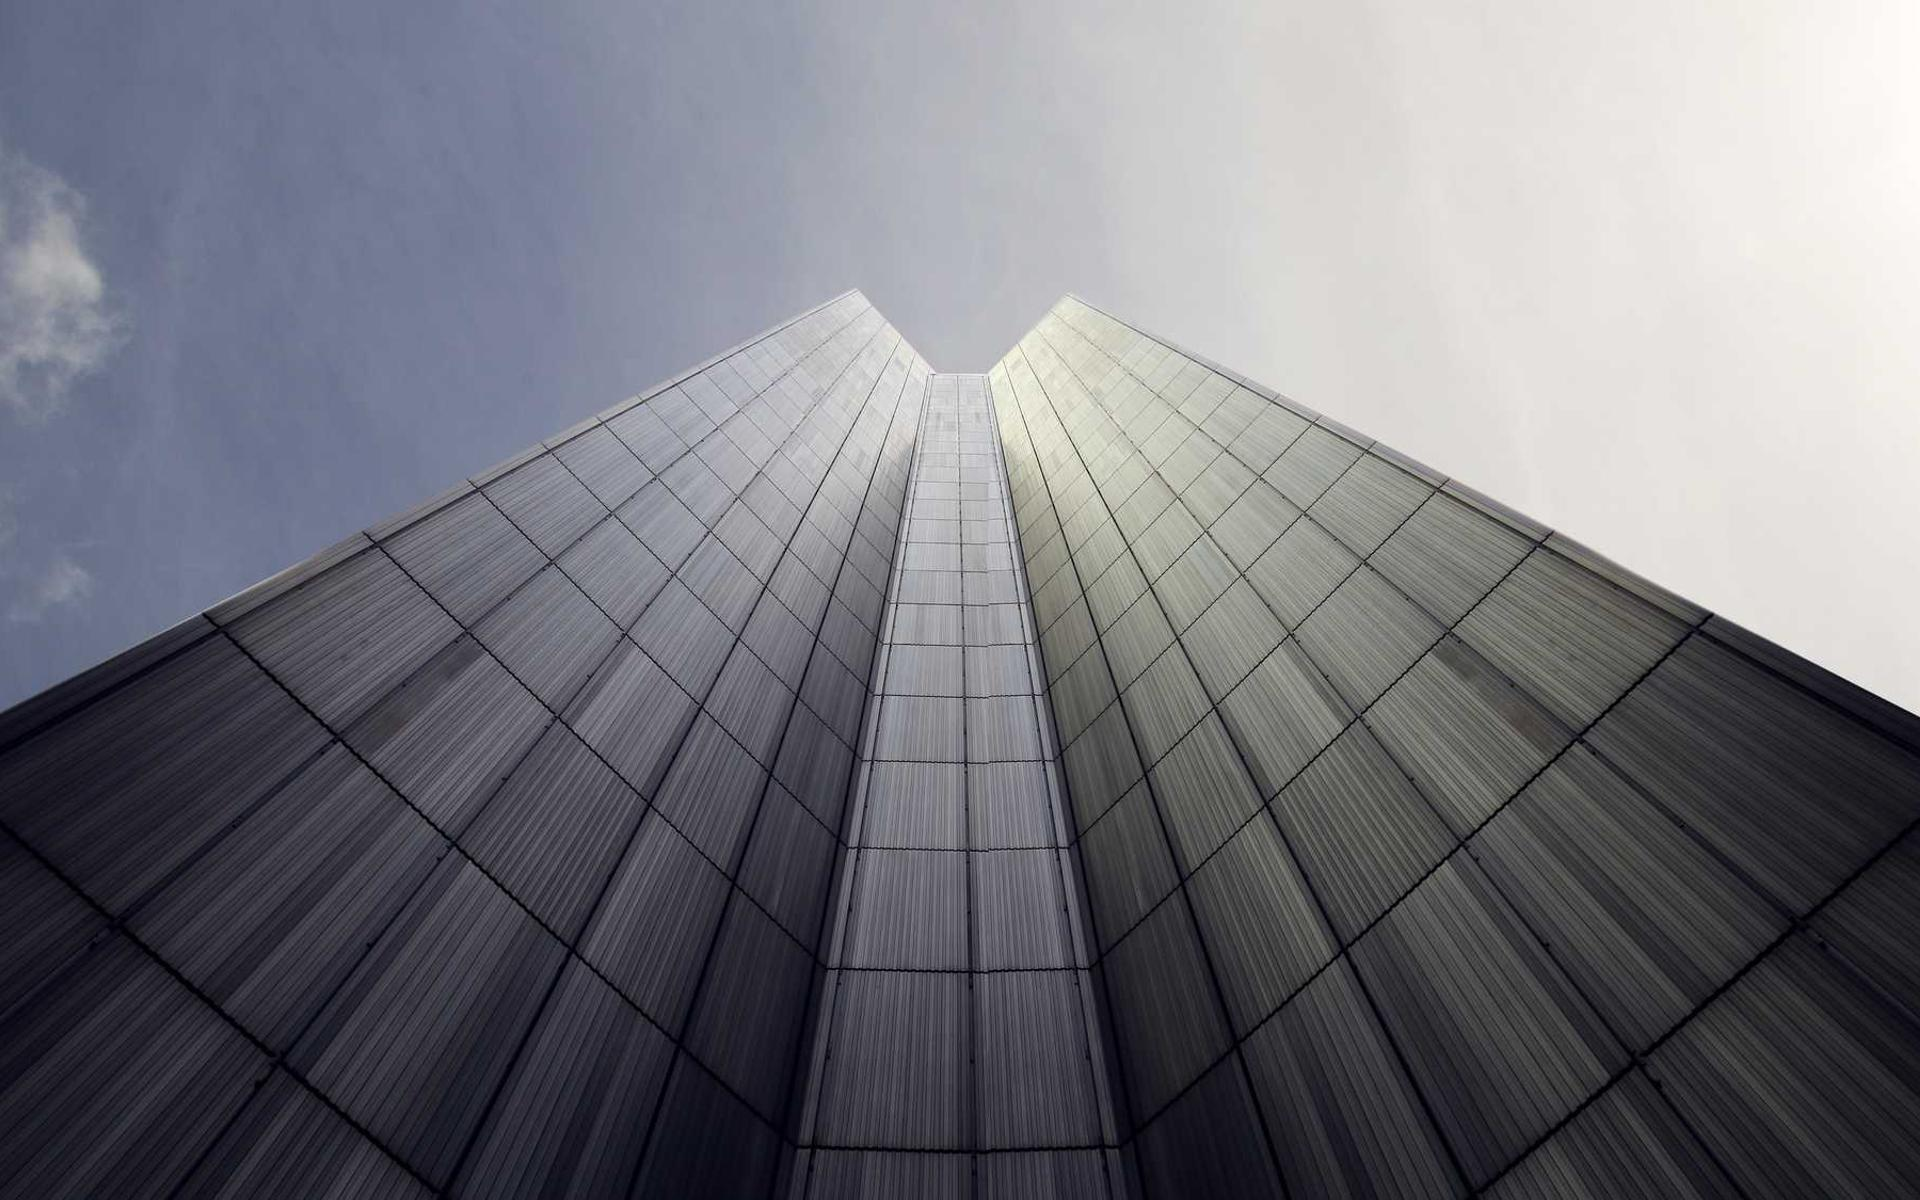

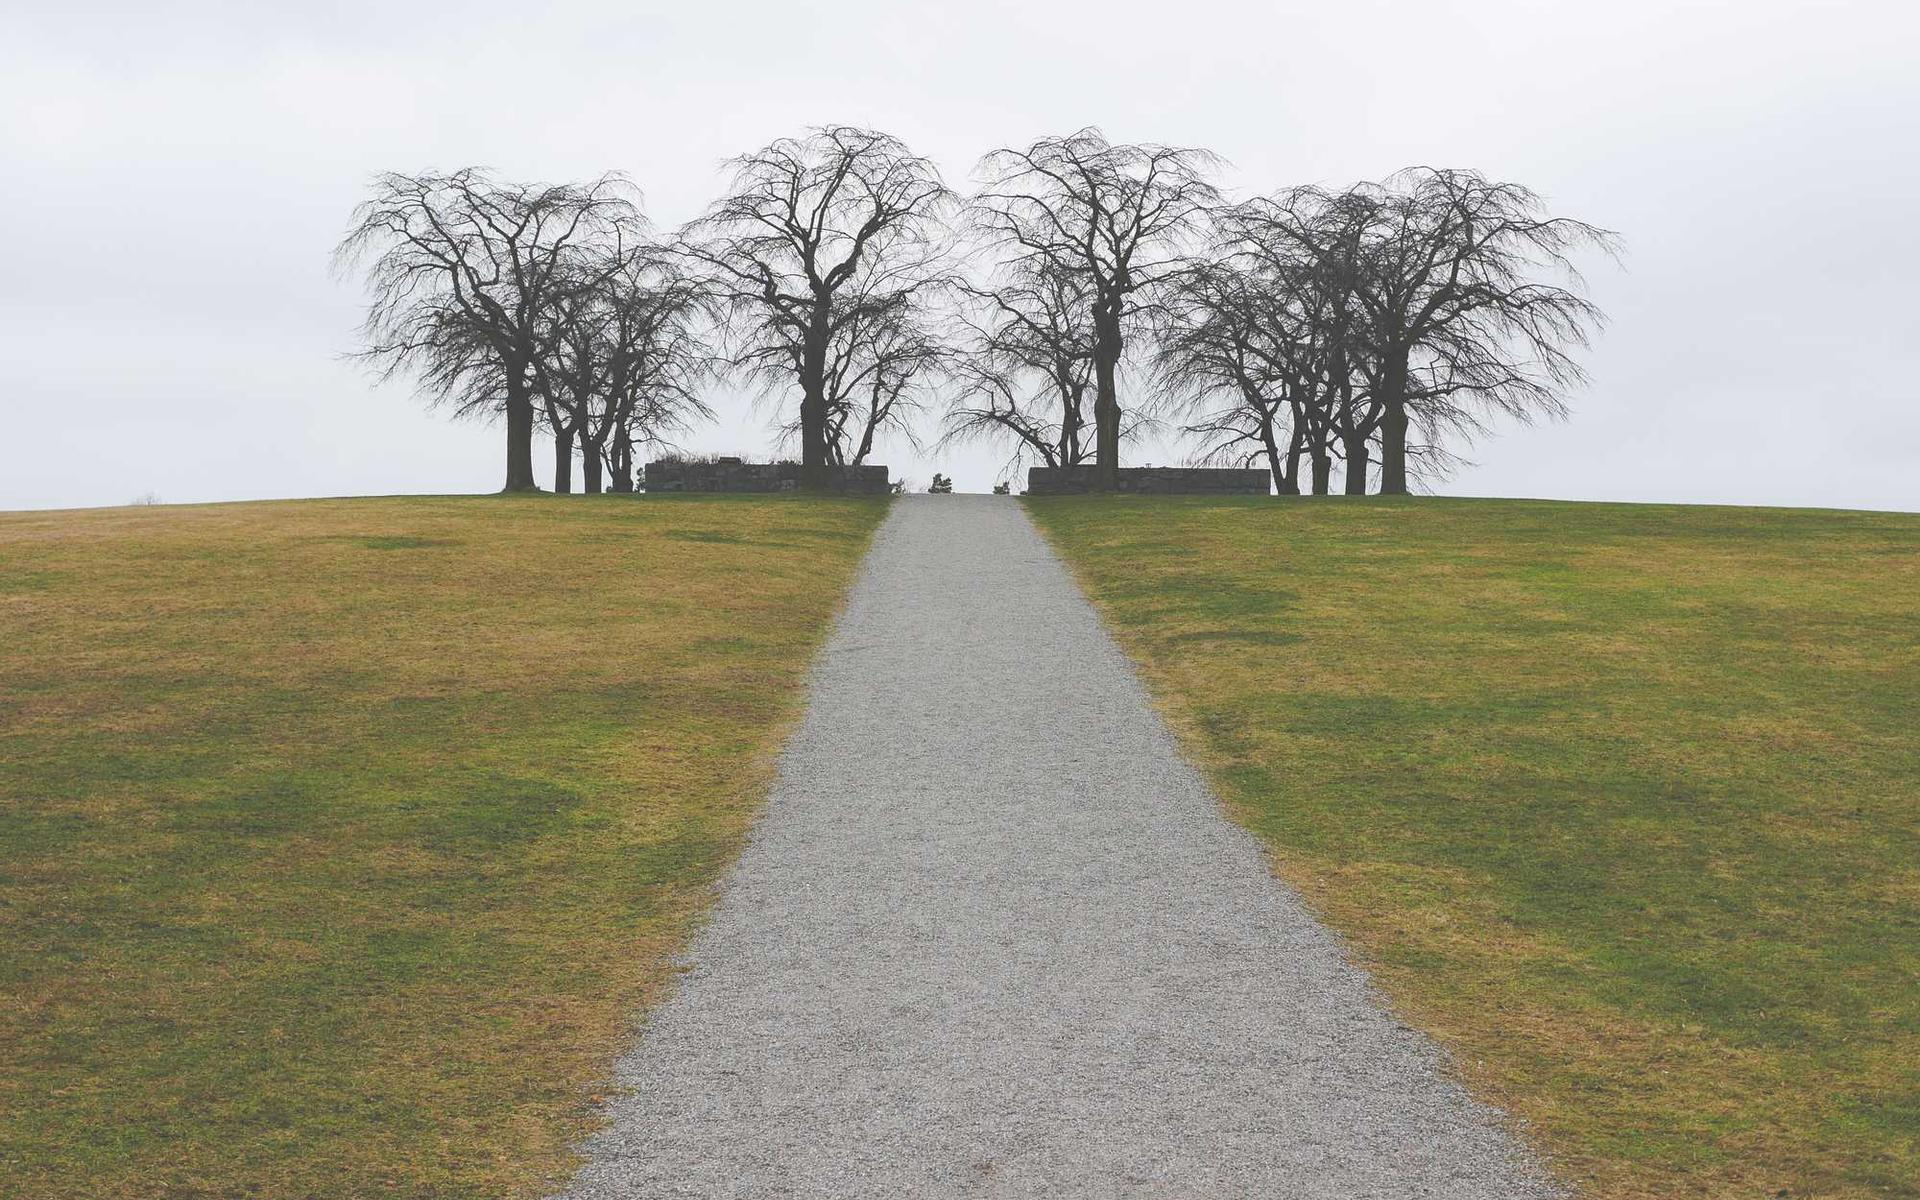

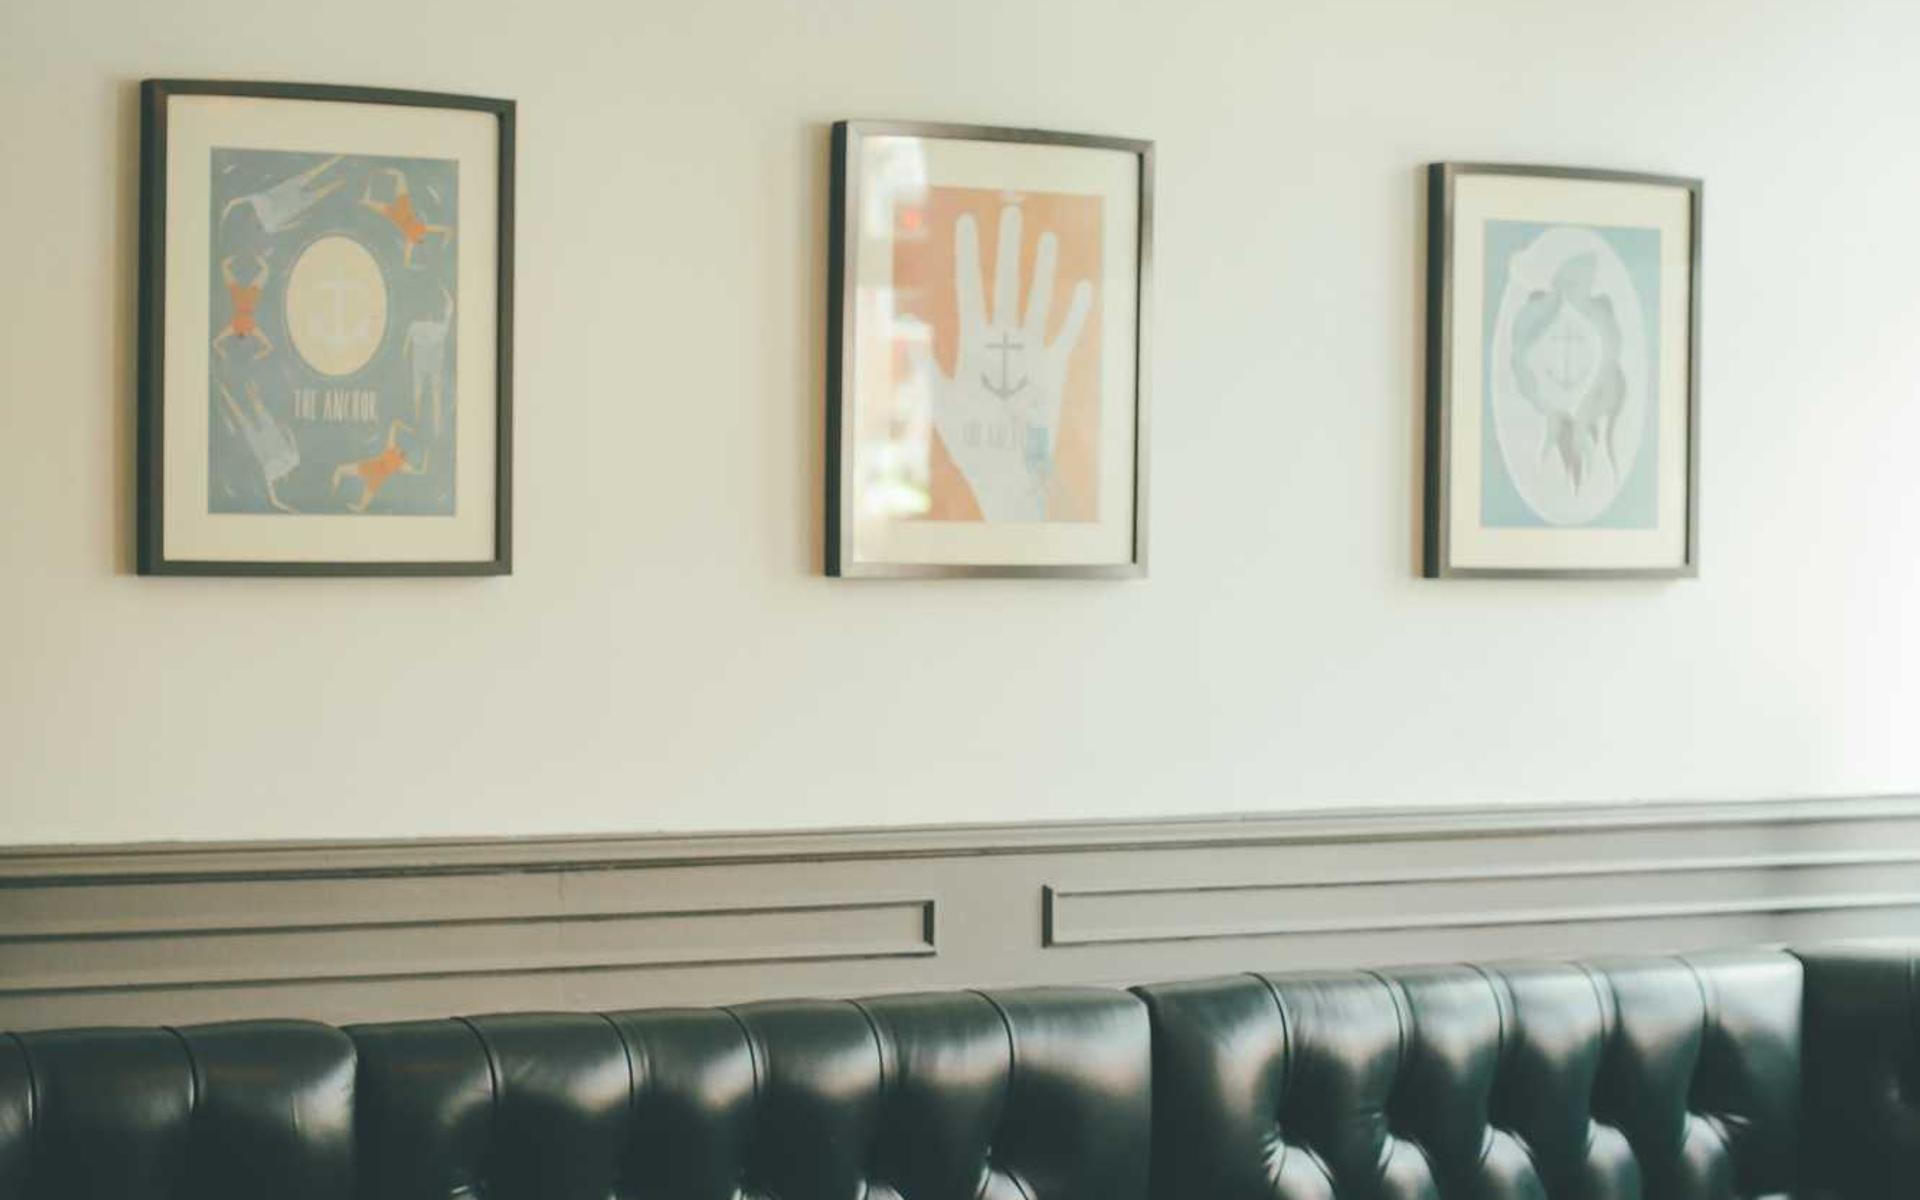

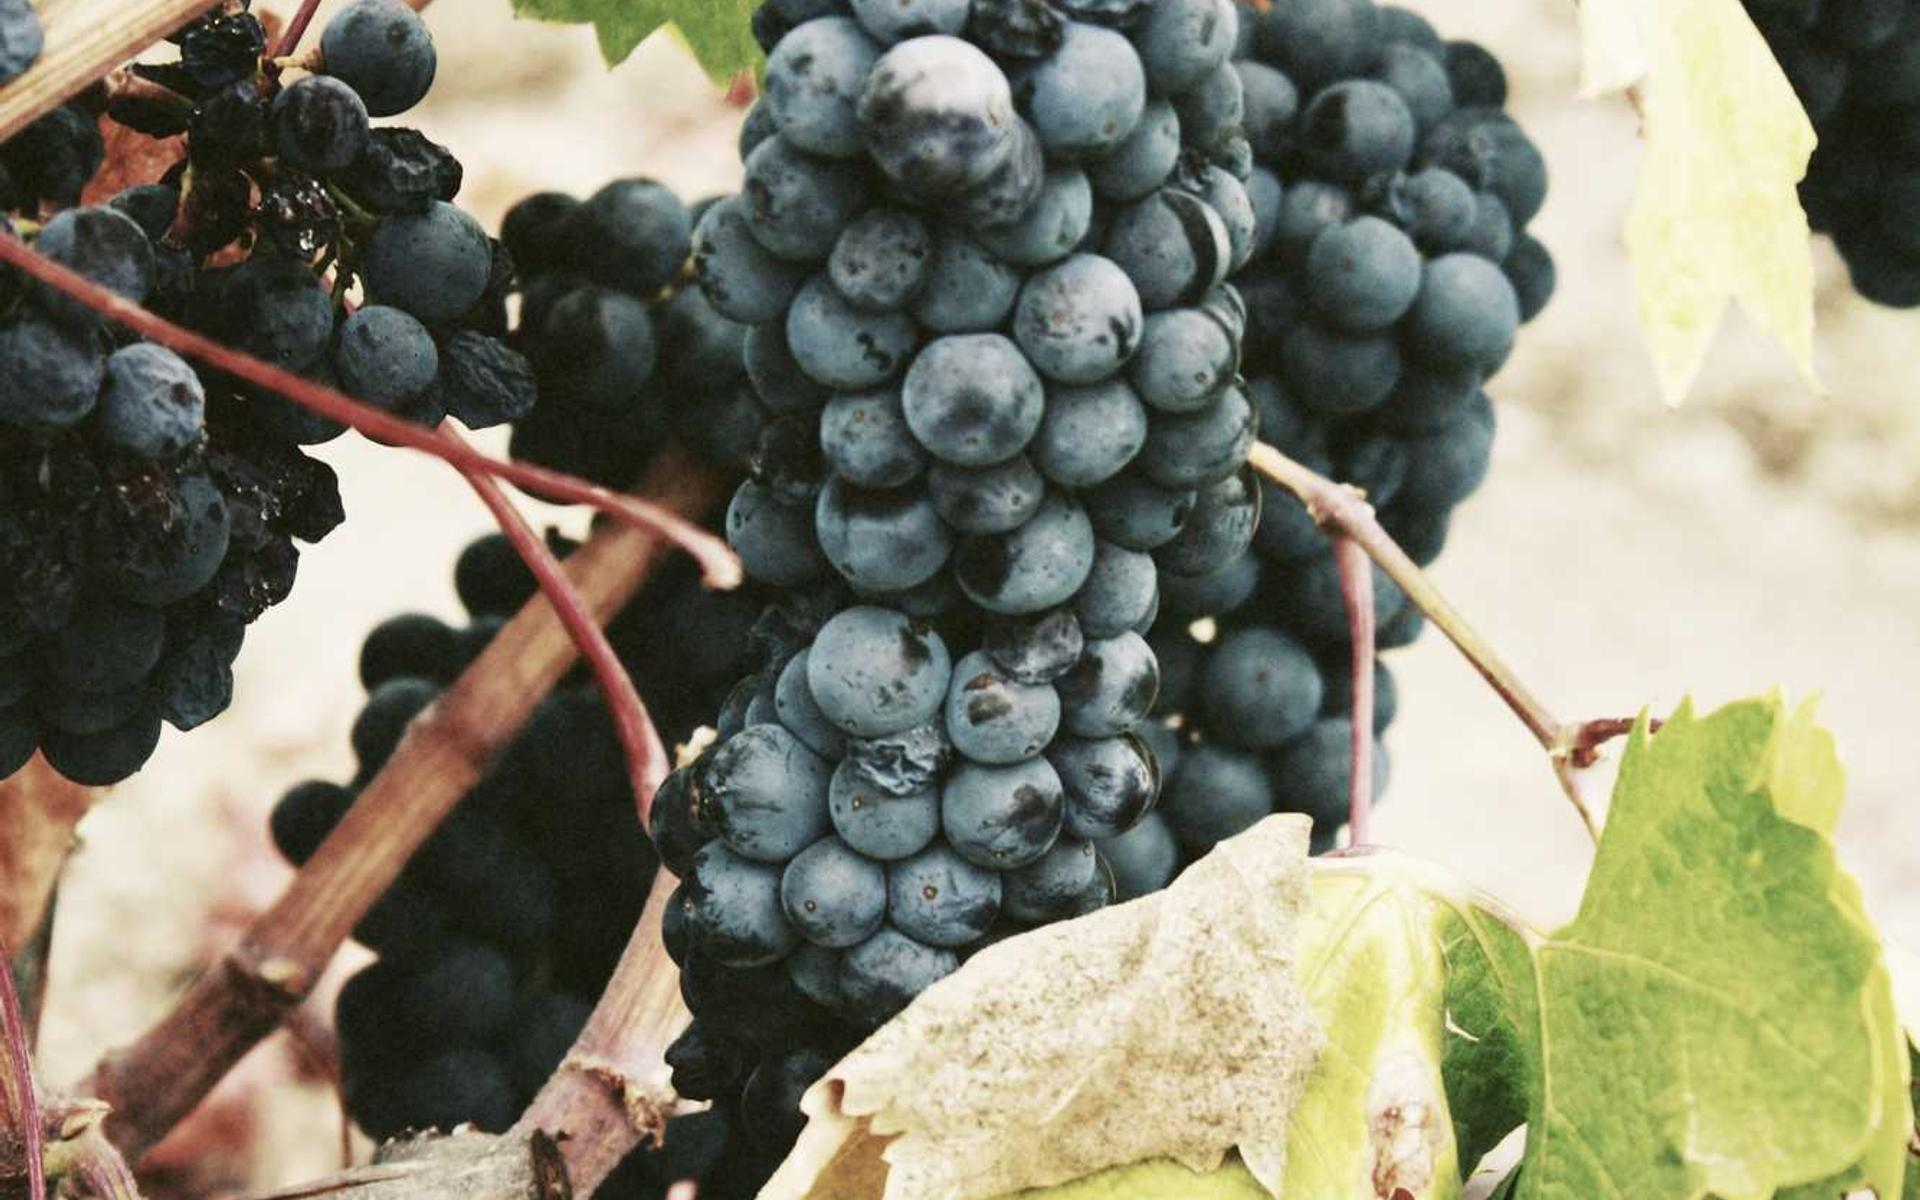

In [10]:
import requests as r
# No change needed for this import
from IPython import display as d
url="https://picsum.photos/1920/1200"

# This line was not used, but the loop is hardcoded to 5
# how_many=int(input("How many Images do you want to download? \n Enter: "))

for i in range(5):
    image_data=r.get(url).content

    with open(f'Download_Image{i}.jpg','wb') as file:
        file.write(image_data)

    # FIX: Call the display function using the module alias 'd'
    d.display(d.Image(f'Download_Image{i}.jpg', width=200, height=200))

In [ ]:
#Python installer 
import requests as r
url='https://www.python.org/ftp/python/3.13.5/python-3.13.5-amd64.exe'
data=r.get(url).content

with open('D:\\Data Science\\Summer-Training-Project\\Day_4\\Downloaded.exe','wb') as file:
    file.write(r.get(url).content)
print('Done')

Done
